This code is a simulation of synchrotron particle acelerator. The mission is create tre graphs of a sychrotron particle. Position and momentum of particle in x,y axis and energy of particle as a function of time and distance to origin "R".

20013598.907992538
Max energy achieved 3.207714942465255e-11
192254.77718953212 -200240854.5200413 200240946.81362173 1.002876390120645 -0.006741314757691875 1901.2918962592908 -0.006721878480130747


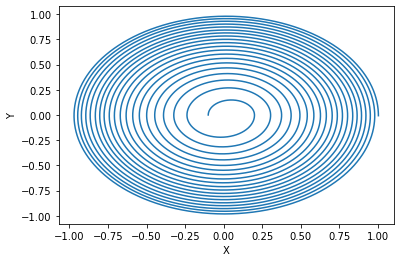

<Figure size 432x288 with 0 Axes>

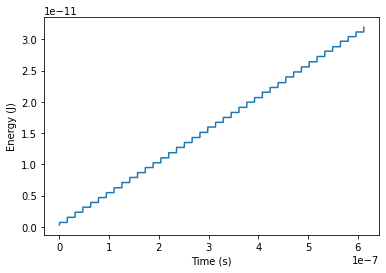

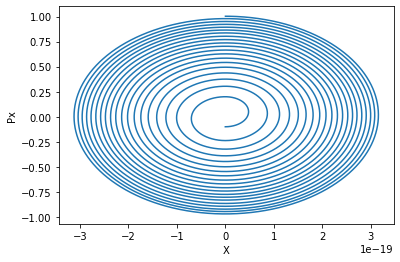

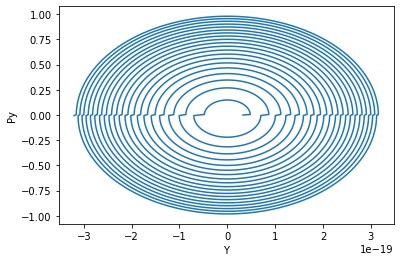

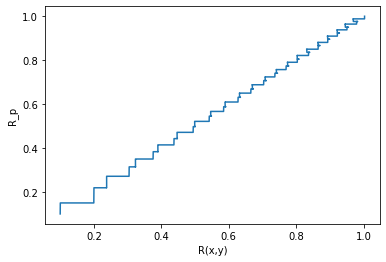

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
#Numbuer of points in simulations.
sample=1000000
#Proton mass
m=1.6e-27
#Proton charge
q=1.602e-19
# Maxmiun radius of particle trajectory
r_max=1
#max momentum
pmax=math.sqrt(2*m*3.20435313e-11)
#Magnetic field of machine
B=pmax/(q*r_max)
#Frecuency of oscillation of particle inside machine
w=q*B/m

#Time step.
dt=9.5e-12
#Initial speed in x axis .
v_initx=0
# Oscillation period
T=2*math.pi/(w)
#Electric field magnitude of machine
e0=0.5e9
#Phase of campo Electric field.
phi=0

#Distance from the "D" to origin
d=0.5e-2
#Initial positions
y_init=0
x_init=-0.1
#Initial speed in y axis .
v_inity=w*abs(x_init)
print(v_inity)
v=math.sqrt(v_initx**2+v_inity**2)
#Array who saves module of velocity in each step.
vs=np.zeros(sample)
#Array who saves x position in each step.
x=np.zeros(sample)
#Array who saves y position in each step.
y=np.zeros(sample)

#Array who saves velocity in x in each step.

vx=np.zeros(sample)

#Array who saves velocity in y in each step.
vy=np.zeros(sample)

#Array who saves distance to origin in each step.
r=np.zeros(sample)


def signo(x):
  #gets the sign of a number x.Return 1 or -1 if the is positive of negative.
  if x>=0:
    return 1
  else:
    return -1
def velocidad_mag_x(t):
    #Return velocity in x axis in a time t
    return v*math.sin(w*dt*t)
def velocidad_mag_y(t):
     #Return velocity in y axis in a time t
      return v*math.cos(w*dt*t)

def vmod(vx,vy):
   #Return velocity magnitude in a time t
  return math.sqrt(vx**2+vy**2)

for t in range(sample):
  v=vmod(v_initx,v_inity)


  if(m*v/(q*B)<r_max):
  #We verify if the particle is inside "D".

    if abs(y_init)>d:
      # Outside D.
      vs[t]=v
      #Velocity in t
      v_initx=velocidad_mag_x(t)
      v_inity=velocidad_mag_y(t)
      #Position in t
      x_init+=v_initx*dt
      y_init+=v_inity*dt
      #Save information of step
      x[t]=x_init
      y[t]=y_init
      vx[t]=v_initx
      vy[t]=v_inity 
      lastvy=v_inity
      r[t]=vmod(x_init,y_init)
      tp+=1
      

 
    
      
    else:
      E=e0*math.cos(w*dt*t+phi)
      # Inside d.
      v=vmod(v_initx,v_inity)
      vs[t]=v
      #Velocity in t considering electric  field
      v_initx=velocidad_mag_x(t)
      v_inity=velocidad_mag_y(t)+E*q*dt/m
      vx[t]=v_initx
      vy[t]=v_inity  
      #Position in t
      x_init+=v_initx*dt
      y_init+=v_inity*dt
      #Save information of step
      x[t]=x_init
      y[t]=y_init
      r[t]=vmod(x_init,y_init)
      tp+=1

            

     
  else:
    print("Max energy achieved {}".format(0.5*m*vmod(v_initx,v_inity)**2))
    break


print(v_initx,v_inity,v,x_init,y_init, w*sample*dt,math.atan(y_init/x_init))

#ii is an aray who is used to plot just non zero values.
ii=x !=0
plt.figure()
plt.plot(x[ii],y[ii])
plt.xlabel("X")
plt.ylabel("Y")
plt.figure()
tg=np.arange(len(vs))*dt
plt.figure()
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.plot(tg[ii],0.5*m*vs[ii]**2)
plt.figure()
plt.ylabel("Px")
plt.xlabel("X")
plt.plot(m*vx[ii],x[ii])
plt.figure()
plt.ylabel("Py")
plt.xlabel("Y")
plt.plot(m*vy[ii],y[ii])
plt.figure()
plt.ylabel("R_p")
plt.xlabel("R(x,y)")
plt.plot(r[ii],m*vs[ii]/(q*B))



